## Scikit Learn

## Encoding

In [ ]:
# label encoding

from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = pd.read_csv("sample_data.csv")

df_label = df.copy()
le = LabelEncoder()
df_label['Gender_Encoded'] = le.fit_transform(df_label['Gender'])   
df_label['Passed_Encoded'] = le.fit_transform(df_label['Passed'])

print("Label Encoded Data:")
print(df_label[['Name', 'Gender', 'Gender_Encoded', 'Passed', 'Passed_Encoded']].head())


# one-hot encoding
df_encoded = pd.get_dummies(df_label, columns=['City'], dtype=int)
print("\nOne-Hot Encoded Data:")
print(df_encoded.head())

Label Encoded Data:
     Name  Gender  Gender_Encoded Passed  Passed_Encoded
0    Aman    Male               1    Yes               1
1   Priya  Female               0    Yes               1
2   Rahul    Male               1     No               0
3  Anjali  Female               0    Yes               1
4    Ravi    Male               1    Yes               1

One-Hot Encoded Data:
     Name  Gender Passed  Gender_Encoded  Passed_Encoded  City_Bangalore  \
0    Aman    Male    Yes               1               1               0   
1   Priya  Female    Yes               0               1               0   
2   Rahul    Male     No               1               0               1   
3  Anjali  Female    Yes               0               1               0   
4    Ravi    Male    Yes               1               1               0   

   City_Chennai  City_Delhi  City_Mumbai  
0             0           1            0  
1             0           0            1  
2             0           0  

## Feature Scaling

In [ ]:
# feature scaling mean = 0, std = 1
# for zero to one scaling

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform()

# minmax scaler for zero to one scaling, but no negative values
scaler_mm = MinMaxScaler()
y_scaled = scaler_mm.fit_transform()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

data = {
    'StudyHours': [2, 4, 6, 8, 10],
    'TestScores': [50, 60, 70, 80, 90],
    
}

# Standard Scaling

df = pd.DataFrame(data)
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(df)

print(pd.DataFrame(standard_scaled, columns=['StudyHours', 'TestScores']))

# MinMax Scaling

minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(df)

print(pd.DataFrame(minmax_scaled, columns=['StudyHours', 'TestScores']))

# train test split

X = df[['StudyHours']]
y = df[['TestScores']] # target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # 20% test data, 80% train data
    random_state=42 # for reproducibility
    )

print("Training data:\n", X_train)
print("Test data:\n", X_test)
print("Training data:\n", y_train)
print("Test data:\n", y_test)

   StudyHours  TestScores
0   -1.414214   -1.414214
1   -0.707107   -0.707107
2    0.000000    0.000000
3    0.707107    0.707107
4    1.414214    1.414214
   StudyHours  TestScores
0        0.00        0.00
1        0.25        0.25
2        0.50        0.50
3        0.75        0.75
4        1.00        1.00
Training data:
    StudyHours
4          10
2           6
0           2
3           8
Test data:
    StudyHours
1           4
Training labels:
    TestScores
4          90
2          70
0          50
3          80
Test labels:
    TestScores
1          60


## Supervised Learning

In [ ]:
#2:05:00 / 4:14:08 PHASE 3 - Supervised Machine Learning with scikit-learn
# Linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# [[]]-> 2d array,list of list
X = [[2], [4], [6], [8], [10]]
y = [40, 80, 120, 160, 200]
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
    )

model = LinearRegression()

Hours = int(input("Enter study hours: "))

model.fit(X_train, y_train)
y_pred = model.predict([[Hours]])

print("="*30)
print("Linear Regression Model")
print("="*30)
print("Predicted value for input", Hours, ":", y_pred)
print("="*30)

Linear Regression Model
Predicted value for input 12 : [240.]


In [ ]:
# Classification (logistic regression, knn, decision tree, random forest)
# Logistic Regression
from sklearn.linear_model import LogisticRegression

X = [[1],[2], [3], [4], [5], [6], [7]] # Hours studied
y = ['Fail', 'Fail', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass'] # Results

model = LogisticRegression()
model.fit(X, y)
hours = float(input("Enter study hours: "))
prediction = model.predict([[hours]])[0] # [0] to get the string value 

print("="*30)
print("Logistic Regression Model")
print("="*30)
print("Predicted result for input", hours, "hours:", prediction)
print("="*30)

Logistic Regression Model
Predicted result for input 2.0 hours: Fail


In [4]:
# KNN Classifier
# Use odd number of neighbors to avoid ties
from sklearn.neighbors import KNeighborsClassifier

X = [ # Weight(grams), Size(cm)
    [180, 7],
    [200, 7.5],
    [250, 8],
    [300, 8.5],
    [330, 9],
    [360, 9.5]
]

# 0 = Apple, 1 = Orange
y = [0, 0, 0, 1, 1, 1]

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)
weight = float(input("Enter fruit weight (grams): "))
size = float(input("Enter fruit size (cm): "))

prediction = model.predict([[weight, size]])[0]

fruit = 'Apple' if prediction == 0 else 'Orange'

print("="*30)
print("KNN Classifier Model")
print("="*30)
print("Predicted fruit:", fruit)
print("="*30)

KNN Classifier Model
Predicted fruit: Orange


In [2]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

X = [ #Size(cm), ColorShade(0-10)
    [7,2], # Apple
    [8,3], # Apple
    [9,8], # Orange
    [10,9] # Orange
]

y = [0, 0, 1, 1] # 0 = Apple, 1 = Orange

model = DecisionTreeClassifier()
model.fit(X, y)
size = float(input("Enter fruit size (cm): "))
color_shade = float(input("Enter fruit color shade (0-10): "))
prediction = model.predict([[size, color_shade]])

print("="*30)
print("Decision Tree Classifier Model")
print("="*30)
if prediction[0] == 0:
    print("The fruit is likely an Apple.")
else:
    print("The fruit is likely an Orange.")
print("="*30)

Decision Tree Classifier Model
The fruit is likely an Apple.


In [ ]:
# Model Evaluation Metrics PHASE 3
# Accuracy, Precision, Recall, F1-Score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = [0, 1, 1, 0, 1, 0, 1] # Actual labels
y_pred = [0, 0, 1, 0, 1, 1, 1] # Predicted labels

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("="*30)
print("Model Evaluation Metrics")
print("="*30)
print(f"Accuracy: {accuracy:.2f}") # Accuracy means total percentage of correct predictions
print(f"Precision: {precision:.2f}") # Precision means percentage of positive predictions that were actually correct
print(f"Recall: {recall:.2f}") # Recall means percentage of actual positives that were correctly identified
print(f"F1-Score: {f1:.2f}") # F1-Score is the harmonic mean of precision and recall
print("="*30)

Model Evaluation Metrics
Accuracy: 0.71
Precision: 0.75
Recall: 0.75
F1-Score: 0.75


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix

y_true = [0, 1, 1, 0, 1, 0, 1] # Actual labels
y_pred = [0, 0, 1, 0, 1, 1, 1] # Predicted labels

cm = confusion_matrix(y_true, y_pred)

print("="*30)
print("Confusion Matrix")
print("="*30)
print(cm)
print("="*30)

# [[TN FP],
#  [FN TP]]
# ideal is a diagonal matrix where TN and TP are high, FP and FN are low

# 3:20:00 / 4:14:08 PHASE 3 - Supervised Machine Learning with scikit-learn

Confusion Matrix
[[2 1]
 [1 3]]


In [5]:
# MAE, MSE, RMSE

# MAE - Mean Absolute Error
# 1. take the mistake difference between actual and predicted values
# 2. remove negative sign by absolute value
# 3. add all absolute values
# 4. divide by number of observations

# MSE - Mean Squared Error
# 1. take the mistake difference between actual and predicted values
# 2. square the differences
# 3. add all squared values
# 4. divide by number of observations

# RMSE - Root Mean Squared Error
# 1. take the mistake difference between actual and predicted values
# 2. square the differences
# 3. add all squared values
# 4. divide by number of observations
# 5. take the square root of the result

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_true = [50, 60, 70, 80, 90] # Actual values
y_pred = [52, 58, 68, 85, 88] # Predicted values

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print("="*30)
print("Regression Model Evaluation Metrics")
print("="*30)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("="*30)

Regression Model Evaluation Metrics
Mean Absolute Error (MAE): 2.60
Mean Squared Error (MSE): 8.20
Root Mean Squared Error (RMSE): 2.86


## Unsupervised Learning

### K-Means Clustering

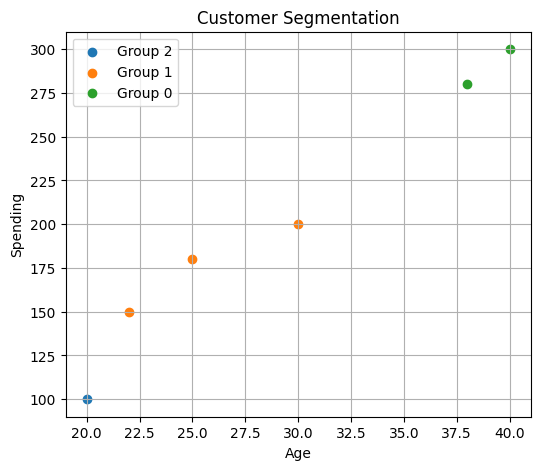

  Customer  Age  Spending  Group
0     Riya   20       100      2
1     Aman   30       200      1
2   Faizan   40       300      0
3     Neha   22       150      1
4    Imran   25       180      1
5    Sneha   38       280      0


In [6]:
# Unsupervised Learning -> Mean & Centroid, Distance (Euclidean, Manhattan), Variance & Spread, Basic Linear Algebra
# finding new data patterns without labeled data
# step 1: Tell the model K (number of clusters) - should be an odd number to avoid ties
# step 2: Randomly initialize K centroids
# step 3: Assign each data point to the nearest centroid (using distance metrics)
# step 4: Recalculate centroids as the mean of assigned points
# step 5: Repeat steps 3 and 4 until centroids stabilize or max iterations reached
# inertia -> sum of squared distances of samples to their closest cluster center (how much variance within clusters)

from sklearn.cluster import KMeans
import pandas as pd
from matplotlib import pyplot as plt
data = {
    'Customer': ['Riya', 'Aman', 'Faizan', 'Neha', 'Imran', 'Sneha'],
    'Age': [20, 30, 40, 22, 25, 38],
    'Spending': [100, 200, 300, 150, 180, 280]
}

df = pd.DataFrame(data)
X = df[['Age', 'Spending']]

model = KMeans(n_clusters=3, random_state=42, n_init=10) # n_init to pick best centroids from 10 different initializations

df['Group'] = model.fit_predict(X)

plt.figure(figsize=(6,5))
for group in df['Group'].unique(): #[0,1]
    group_data = df[df['Group'] == group]
    plt.scatter(group_data['Age'], group_data['Spending'], label=f'Group {group}')

plt.xlabel('Age')
plt.ylabel('Spending')
plt.title('Customer Segmentation')
plt.grid(True)
plt.legend()
plt.show()

print(df)

Variance captured by each principal component:
[99.76  0.24] % of total variance captured by first 2 components


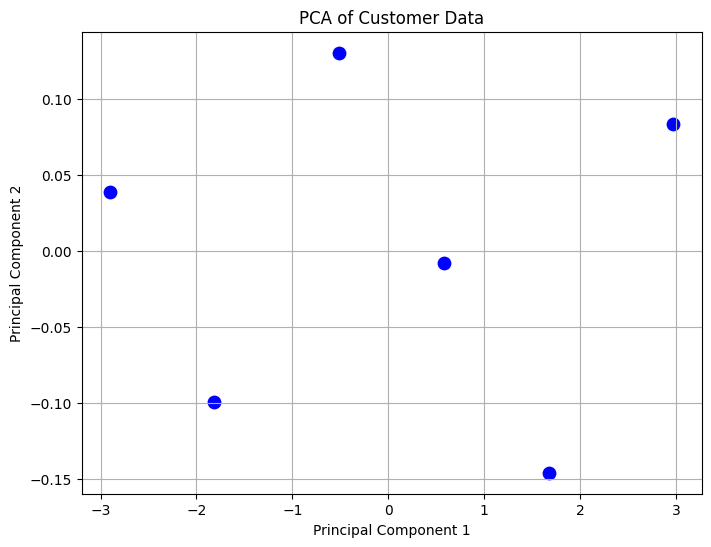

      PCA 1     PCA 2
0 -2.902938  0.039005
1 -1.812306 -0.099169
2 -0.510045  0.130372
3  0.580588 -0.007801
4  1.671220 -0.145974
5  2.973481  0.083567


In [11]:
# PCA - Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

data = {
    'Age': [25, 30, 35, 40, 45, 50],
    'Income': [50000, 60000, 80000, 90000, 100000, 120000],
    'Spending': [30, 40, 50, 60, 70, 80],
    'Savings': [2000, 3000, 4000, 5000, 6000, 7000]
}

df = pd.DataFrame(data)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_data, columns=['PCA 1', 'PCA 2'])

explained_variance = pca.explained_variance_ratio_

print("Variance captured by each principal component:")
print(np.round(explained_variance *100, 2), "% of total variance captured by first 2 components")

plt.figure(figsize=(8,6))

plt.scatter(pca_df['PCA 1'], pca_df['PCA 2'], color='blue', s=80)

plt.title('PCA of Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

print(pca_df)

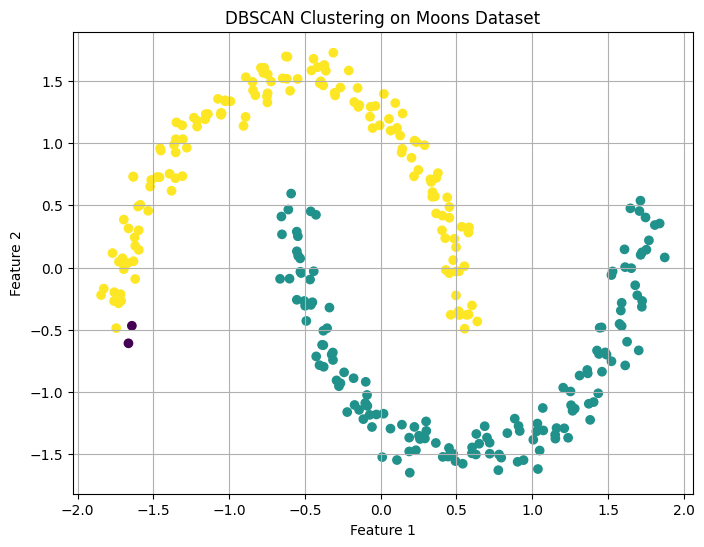

In [16]:
# DBSCAN - Density-Based Spatial Clustering of Applications with Noise
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.2, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
plt.title('DBSCAN Clustering on Moons Dataset')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()